In [1]:
from modules.function import get_elem_count, pymatgen_comp, get_number_of_components, get_comp_count_over_bins
from modules.plotting import periodic_table_heatmap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
data_file = 'dataset/Hardness_CURATED_Dec2022_FixedElementsExcluded.csv'
fig_location = 'figures'
df = pd.read_csv(data_file)
df.columns = ['Composition','Database','Temperature','HardGPa']
df['n_eles'] = get_number_of_components(df['Composition'])
df['HardGPa']= df['HardGPa'].div(1e9)

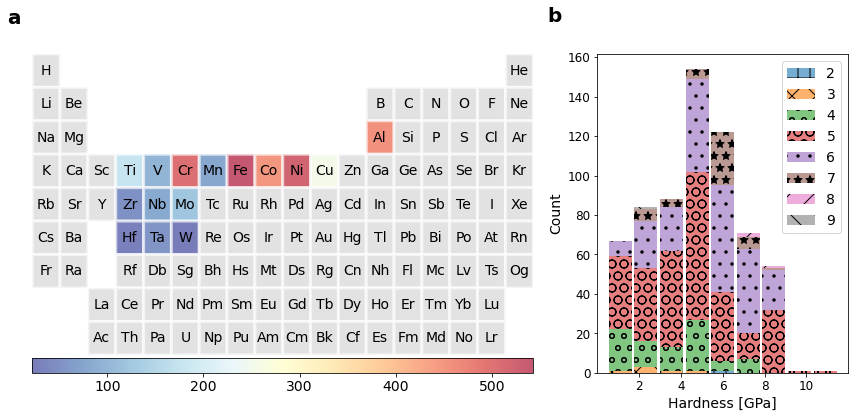

In [22]:
elem_count = get_elem_count(df['Composition'])
df['n_eles'] = get_number_of_components(df['Composition'])
min_eles = df['n_eles'].min()
max_eles = df['n_eles'].max()
slices = []
for i in np.arange(min_eles, max_eles+1):
    slices.append(df['HardGPa'][df['n_eles']==i].values)

_,bins = get_comp_count_over_bins(df['HardGPa'].values,10)
fig, axs = plt.subplot_mosaic("ab", figsize=(30,3),gridspec_kw={'width_ratios': [4, 2]})
for n, (key, ax) in enumerate(axs.items()):
        if n == 0:
            ax = periodic_table_heatmap(elem_count,fig,ax,blank_color='lightgrey',edge_color='white', value_format='%.0f',
                            cmap='RdYlBu_r',symbol_fontsize=14,value_fontsize=4)
            ax.text(-0.05, 1.1, key, transform=ax.transAxes, size=20, weight='bold')
        if n == 1:
            n,bins,patches = ax.hist(slices,bins=bins-0.5,rwidth=0.9,stacked=True,alpha=0.6)

            hatches = ['+', 'x', 'o', 'O', '.', '*','/', '\\', '|', '-', ]
            for patch_set, hatch in zip(patches, hatches):
                for patch in patch_set.patches:
                    patch.set_hatch(hatch)
            ax.legend(np.arange(min_eles, max_eles+1),fontsize=14)
            ax.set_xlabel('Hardness [GPa]',fontsize=14)
            ax.set_ylabel('Count',fontsize=14)
            ax.tick_params(axis='both', which='major', labelsize=12)
            ax.text(-0.2, 1.1, key, transform=ax.transAxes, 
                size=20, weight='bold')

plt.tight_layout()
fig.subplots_adjust(hspace=0.3)
plt.savefig(fig_location+'/combined.jpeg')

<module 'matplotlib.pyplot' from '/noether/s0/aqd5773/anaconda3/envs/monbw_alloy_hardness/lib/python3.10/site-packages/matplotlib/pyplot.py'>

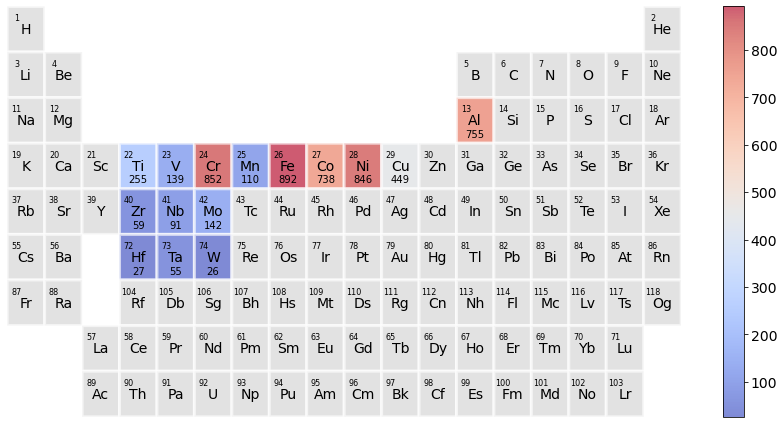

In [3]:
elem_count = get_elem_count(df['Composition'])
periodic_table_heatmap(elem_count,blank_color='lightgrey',edge_color='white', value_format='%.0f',
                            cmap='coolwarm',save_name = fig_location+'/hardness_monbw.pdf')

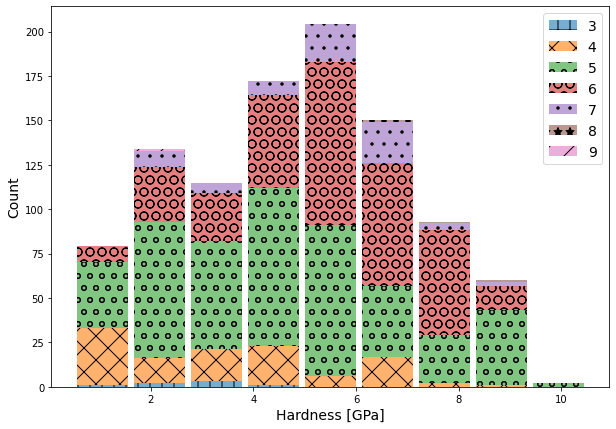

In [14]:
df['n_eles'] = get_number_of_components(df['Composition'])
min_eles = df['n_eles'].min()
max_eles = df['n_eles'].max()
slices = []
for i in np.arange(min_eles, max_eles+1):
    slices.append(df['HardGPa'][df['n_eles']==i].values)

_,bins = get_comp_count_over_bins(df['HardGPa'].values,10)

fig,ax = plt.subplots(figsize=(10,7))

n,bins,patches = plt.hist(slices,bins=bins-0.5,rwidth=0.9,stacked=True,alpha=0.6)

hatches = ['+', 'x', 'o', 'O', '.', '*','/', '\\', '|', '-', ]
for patch_set, hatch in zip(patches, hatches):
    for patch in patch_set.patches:
        patch.set_hatch(hatch)
#plt.yticks(np.arange(0,80,10),fontsize=12)
#plt.xticks(np.arange(100,1000,100),fontsize=12)
plt.legend(np.arange(min_eles, max_eles+1),fontsize=14)
plt.xlabel('Hardness [GPa]',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.savefig(fig_location+'/hardness_dist.pdf')